In [1]:
pwd

'/Users/sathishrajendiran/ist718-python/Labs/Lab1'

*   Course: IST 718
*   Authors: Sathish Kumar Rajediran
*   Task: Week2 Sync
*   Task Item: Best Salary Recommendation fo Syracuse Head Football Coach
*   Date: April 19,2021

## Objective
This case study provides an opportunity to demonstrate our ability to combine datasets and produce meaningful analysis. Specifically, we would like to provide a decision maker with more than just data—we want to provide insights, understanding, and wisdom. This exercise allows the student an opportunity to demonstrate progress (or mastery) of learning objectives 1, 2, 3, 4, and 5.
* 1) Obtain data and understand data structures and data elements.
* 2) Scrub data using scripting methods, to include debugging, for data manipulation in R and other tools.
* 3) Explore data using essential qualitative analysis techniques, including descriptive statistics.
* 4) Model relationships between data using the appropriate analytical methodologies matched to the information and the needs of clients and users.
* 5) Interpret the data, model, analysis, and findings, and communicate the results in a meaningful way.

## Instructions
 The research question is, how can we recommend the best salary (total compensation, minus bonus) for our next head football coach?
* Start with the data Coaches.
* Review the data—clean as appropriate.
* Consider the base worksheet and the additional data.
   * Stadium size
   * Graduation rate:
   * Available from http://fs.ncaa.org/Docs/newmedia/public/rates/index.html
   * Use the 2006 cohort and include both GSR and FGR
   * Annual donations to program (if available)
* Develop an additional vector for each school using last year’s record.
* Build a data frame for your analysis.
* Conduct an initial data analysis.
* Fit a regression model with the salary as the response and the relevant predictors (i.e., you will need more than one predictor).
* Answer the following questions in your report:
   * What is the recommended salary for the Syracuse football coach?
   * What would his salary be if we were still in the Big East? What if we went to the Big Ten?
   * What schools did we drop from our data, and why?
   * What effect does graduation rate have on the projected salary?
   * How good is our model?
   * What is the single biggest impact on salary size?
* Bonus:
   * Develop a geographic visualization that in your view best depicts the conferences’ median salary.
   * Fit a hierarchical model based on conference.
* Double bonus:
   * Using some additional materials—https://apsportal.ibm.com/analytics—recreate your code for the basic regression model with a training and test set, but do not use conference as a predictor.
   
## Additional Instructions
* Don’t forget what you learned in your previous courses; do your own work, document any assistance, and use comments for clarity.

## Submission Items
* Case study report with data analysis, graphics, and answers to specific questions
* Supporting notebook for the report—be sure to include comments regarding how you combined additional data into your analysis

In [2]:
# ***********************************************************************************
#      import libraries
# ***********************************************************************************

# standard library
import os
import sys
from datetime import datetime
import time
import timeit


# import packages for analysis and modeling
import pandas as pd  # data frame operations

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING



print('Libraries imported successfully!\n')

os.getcwd()

Libraries imported successfully!



'/Users/sathishrajendiran/ist718-python/Labs/Lab1'

In [3]:
ls

Coaches9.csv           CollegeRecords.csv     Rajendiran_Lab1.ipynb
CollegeRank.csv        GraduationRates.csv    Stadiums.csv


In [4]:
# ***********************************************************************************
#       Working with files  
# ***********************************************************************************

# Read the train and test tsv files from the corpus folder into dataframes

# !pwd

fpath = "/Users/sathishrajendiran/ist718-python/Labs/Lab1/"

try: 
    Coaches = pd.read_csv(fpath + "Coaches9.csv")
    print('Coaches data - Total Number of rows Processed: ',len(Coaches))
except:
    print("Is the file in correct directory?")


Coaches data - Total Number of rows Processed:  129


In [5]:
# Show all columns and do not truncate in the data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [6]:
print(Coaches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School        129 non-null    object
 1   Conference    129 non-null    object
 2   Coach         129 non-null    object
 3   SchoolPay     129 non-null    object
 4   TotalPay      129 non-null    object
 5   Bonus         129 non-null    object
 6   BonusPaid     129 non-null    object
 7   AssistantPay  129 non-null    object
 8   Buyout        129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB
None


In [7]:
Coaches.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [8]:
# pd.set_option('display.float_format',lambda x: '%.2f' % x)
# pd.reset_option('display.float_format')

In [9]:
# summary statistics
summary = Coaches.describe()
summary.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
count,129,129,129,129,129,129,129,129,129
unique,129,11,129,104,105,85,51,1,102
top,Kansas,SEC,Dino Babers,"$3,500,000","$3,500,000",--,--,$0,--
freq,1,14,1,5,5,22,41,129,22


In [10]:
# confirm there are no NULL values in the dataset
pd.isnull(Coaches).sum()

School          0
Conference      0
Coach           0
SchoolPay       0
TotalPay        0
Bonus           0
BonusPaid       0
AssistantPay    0
Buyout          0
dtype: int64

In [11]:
#drop SchoolPay as its a almost same as TotalPay column
Coaches.drop("SchoolPay",axis=1,inplace=True)
Coaches.drop("AssistantPay",axis=1,inplace=True)
Coaches.drop("BonusPaid",axis=1,inplace=True)

In [12]:
# summary statistics
summary = Coaches.describe()
summary.head()

,School,Conference,Coach,TotalPay,Bonus,Buyout
count,129,129,129,129,129,129
unique,129,11,129,105,85,102
top,Kansas,SEC,Dino Babers,"$3,500,000",--,--
freq,1,14,1,5,22,22


In [13]:
Coaches.head()

,School,Conference,Coach,TotalPay,Bonus,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,247000,--
1,Akron,MAC,Terry Bowden,"$412,500","$225,000","$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$1,100,000","$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$950,000","$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$295,000","$2,160,417"


In [14]:
# function to clean currency values
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', '').replace('--', '0'))
    return(x)

In [15]:
#clean currency values
Coaches["TotalPay"] = Coaches["TotalPay"].apply(clean_currency).astype('float')
Coaches["Bonus"] = Coaches["Bonus"].apply(clean_currency).astype('float')
# Coaches["BonusPaid"] = Coaches["BonusPaid"].apply(clean_currency).astype('float')
Coaches["Buyout"] = Coaches["Buyout"].apply(clean_currency).astype('float')

In [16]:
#display any columns with value as 0
Coaches.loc[(Coaches==0).any(axis=1)]

,School,Conference,Coach,TotalPay,Bonus,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000.0,247000.0,0.0
9,Army,Ind.,Jeff Monken,932521.0,0.0,0.0
12,Baylor,Big 12,Matt Rhule,0.0,0.0,0.0
14,Boston College,ACC,Steve Addazio,2514859.0,0.0,0.0
16,Brigham Young,Ind.,Kalani Sitake,0.0,0.0,0.0
28,Duke,ACC,David Cutcliffe,2540928.0,0.0,0.0
50,Liberty,Ind.,Turner Gill,947281.0,0.0,0.0
60,Miami (Fla.),ACC,Mark Richt,4058061.0,0.0,0.0
66,Mississippi,SEC,Matt Luke,3000000.0,1550000.0,0.0
67,Mississippi State,SEC,Joe Moorhead,2600000.0,1350000.0,0.0


In [17]:
#display all columns with value as 0
Coaches[(Coaches.sum(axis=1)==0)]

,School,Conference,Coach,TotalPay,Bonus,Buyout
12,Baylor,Big 12,Matt Rhule,0.0,0.0,0.0
16,Brigham Young,Ind.,Kalani Sitake,0.0,0.0,0.0
91,Rice,C-USA,Mike Bloomgren,0.0,0.0,0.0
99,Southern Methodist,AAC,Sonny Dykes,0.0,0.0,0.0


In [18]:
#remove rows with all columns having 0 values

Coaches = Coaches[(Coaches.sum(axis=1)!=0)]


In [19]:
Coaches.head()

,School,Conference,Coach,TotalPay,Bonus,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000.0,247000.0,0.0
1,Akron,MAC,Terry Bowden,412500.0,225000.0,688500.0
2,Alabama,SEC,Nick Saban,8307000.0,1100000.0,33600000.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,950000.0,3847500.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,295000.0,2160417.0


In [20]:
print(Coaches.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 128
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   School      125 non-null    object 
 1   Conference  125 non-null    object 
 2   Coach       125 non-null    object 
 3   TotalPay    125 non-null    float64
 4   Bonus       125 non-null    float64
 5   Buyout      125 non-null    float64
dtypes: float64(3), object(3)
memory usage: 6.8+ KB
None


In [21]:
Coaches

,School,Conference,Coach,TotalPay,Bonus,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000.0,247000.0,0.0
1,Akron,MAC,Terry Bowden,412500.0,225000.0,688500.0
2,Alabama,SEC,Nick Saban,8307000.0,1100000.0,33600000.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,950000.0,3847500.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,295000.0,2160417.0
...,...,...,...,...,...,...
124,West Virginia,Big 12,Dana Holgorsen,3617500.0,1000000.0,7150000.0
125,Western Kentucky,C-USA,Mike Sanford Jr.,805850.0,400000.0,1200000.0
126,Western Michigan,MAC,Tim Lester,800000.0,346500.0,800000.0
127,Wisconsin,Big Ten,Paul Chryst,3750000.0,0.0,6000000.0


In [22]:
print(Coaches["Conference"].unique())

['Mt. West' 'MAC' 'SEC' 'C-USA' 'Sun Belt' 'Pac-12' 'Ind.' 'ACC' 'AAC'
 'Big Ten' 'Big 12']


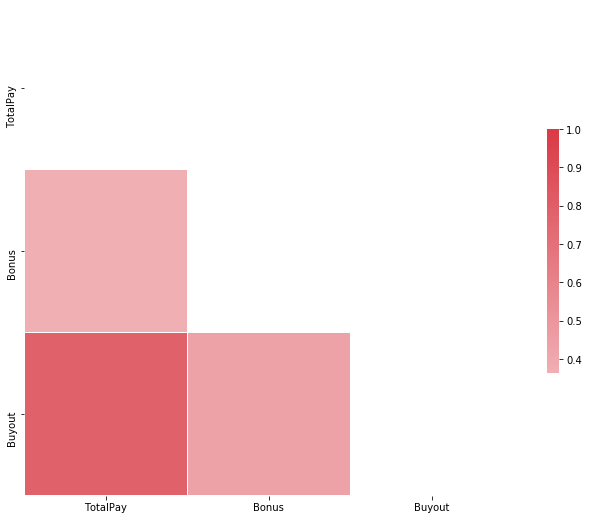

In [23]:
# Enlarge the plot
plt.figure(figsize=(12,9))

# Calculate correlations
corr = Coaches.corr()
 

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

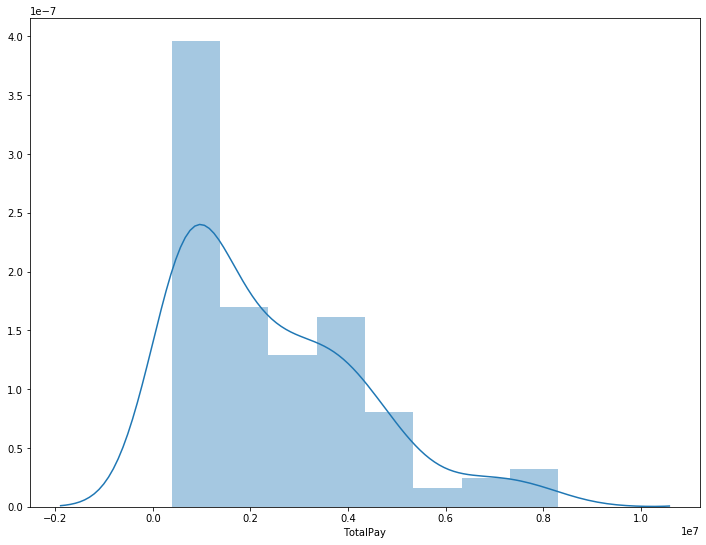

In [24]:
# Enlarge the plot
plt.figure(figsize=(12,9))

# Distribution Plot (a.k.a. Histogram)
sns.distplot(Coaches.TotalPay)

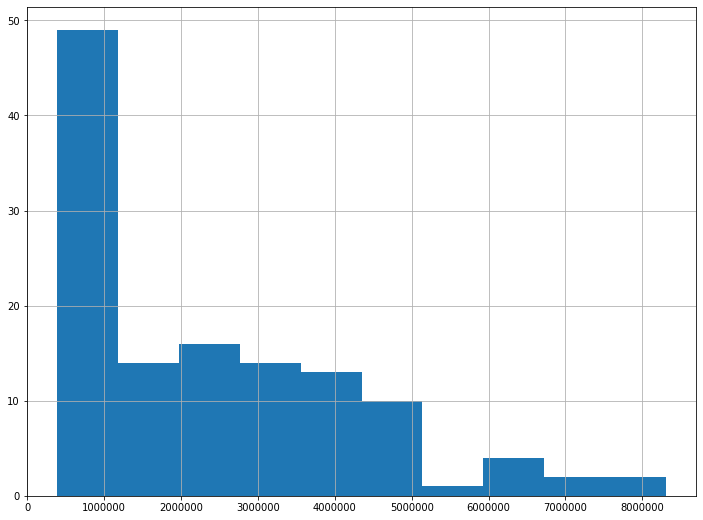

In [25]:
# Enlarge the plot
plt.figure(figsize=(12,9))

Coaches["TotalPay"].hist()

In [26]:
ordered_conf_names = (sorted(set(Coaches['Conference']), reverse = False))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

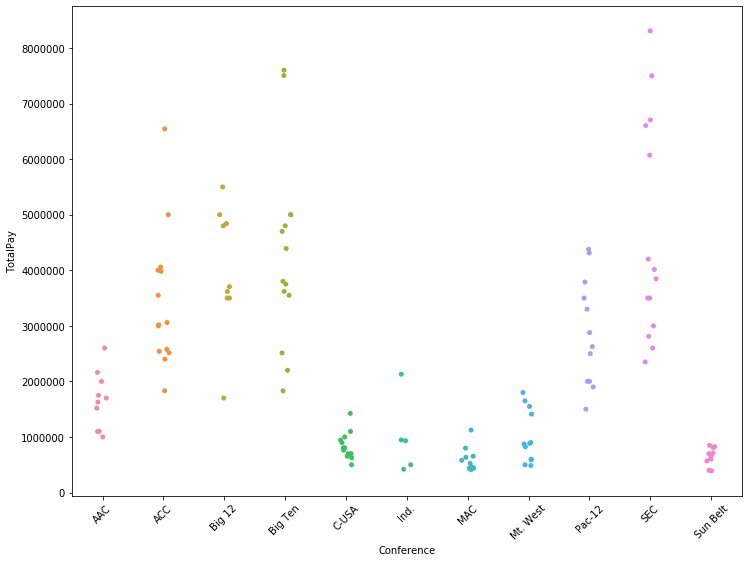

In [27]:
# Enlarge the plot

plt.figure(figsize=(12,9))


sns.stripplot(x = "Conference", y = "TotalPay", data = Coaches, order = ordered_conf_names)


# Rotate x-labels
plt.xticks(rotation=45)



(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text xticklabel objects>)

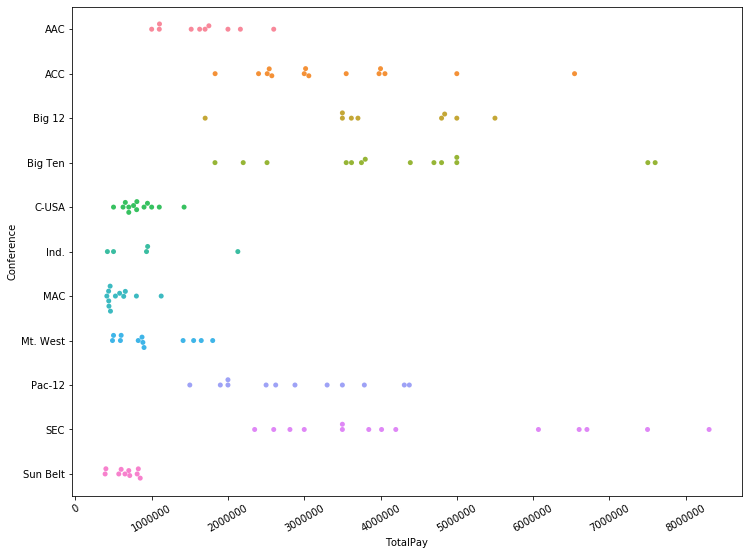

In [28]:
# Enlarge the plot

plt.figure(figsize=(12,9))

sns.swarmplot(x = "TotalPay", y = "Conference", data = Coaches, order = ordered_conf_names)

# Rotate x-labels
plt.xticks(rotation=30)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

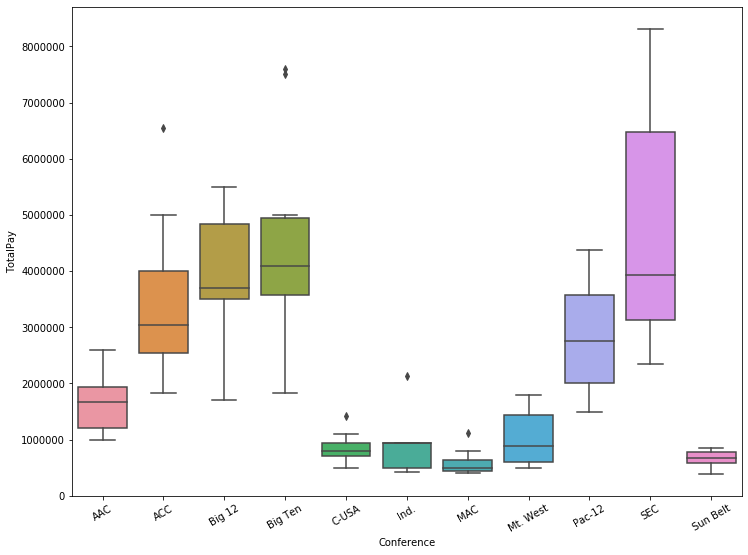

In [37]:
# Enlarge the plot

plt.figure(figsize=(12,9))

sns.boxplot(x = "Conference", y = "TotalPay", data = Coaches, order = ordered_conf_names)

# Rotate x-labels
plt.xticks(rotation=30)

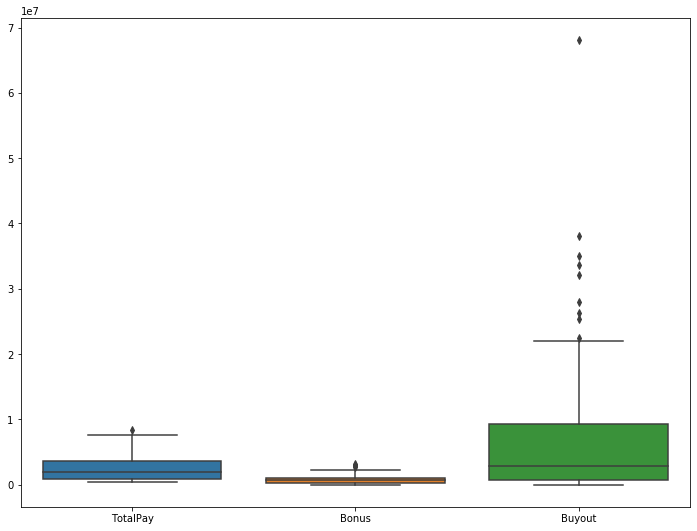

In [29]:
# Enlarge the plot
plt.figure(figsize=(12,9))

# Default boxplot
sns.boxplot(data = Coaches)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 11 Text xticklabel objects>)

<Figure size 864x648 with 0 Axes>

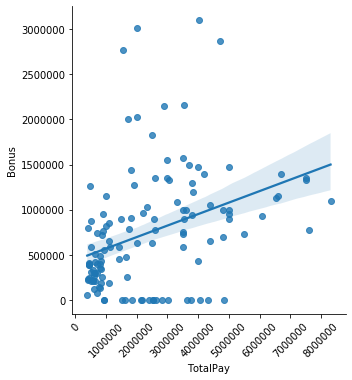

In [30]:
# Enlarge the plot
plt.figure(figsize=(12,9))

# Recommended way
sns.lmplot(x='TotalPay', y='Bonus', data=Coaches)
# Rotate x-labels
plt.xticks(rotation=45)

In [31]:
type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

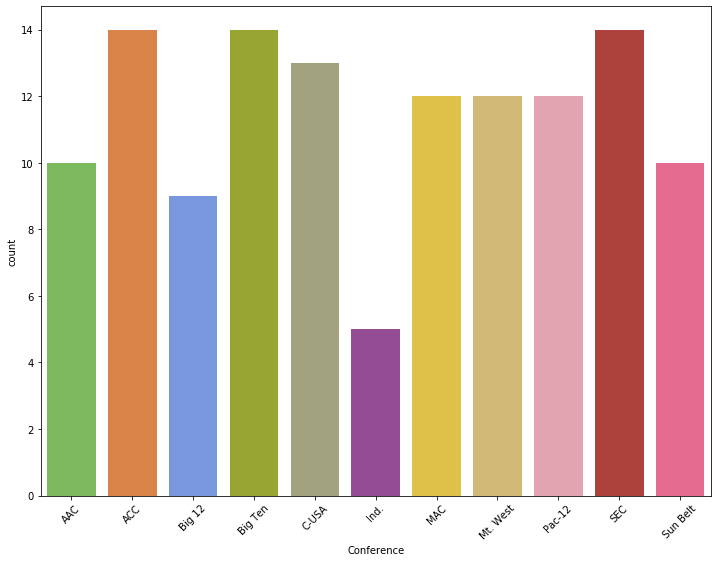

In [32]:
# Enlarge the plot
plt.figure(figsize=(12,9))

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Conference', data=Coaches,palette=type_colors, order = ordered_conf_names) 

# Rotate x-labels
plt.xticks(rotation=45)

plt.show()

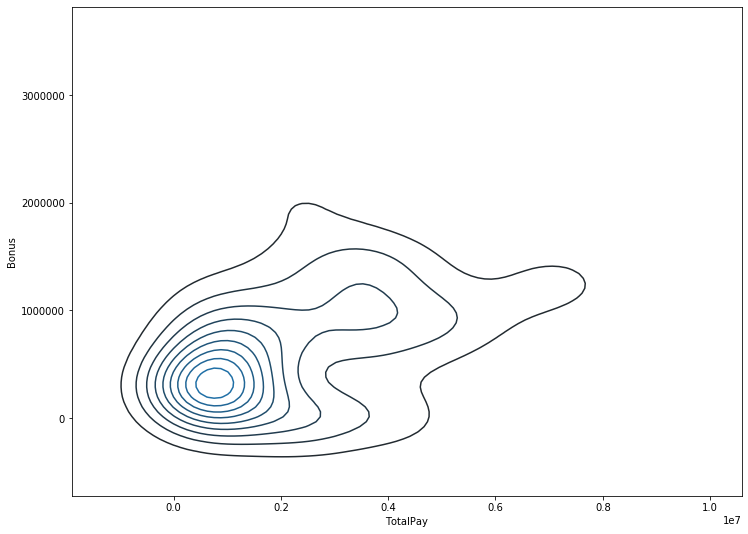

In [33]:
# Enlarge the plot
plt.figure(figsize=(12,9))


# Density Plot
sns.kdeplot(Coaches.TotalPay, Coaches.Bonus)

<Figure size 1440x648 with 0 Axes>

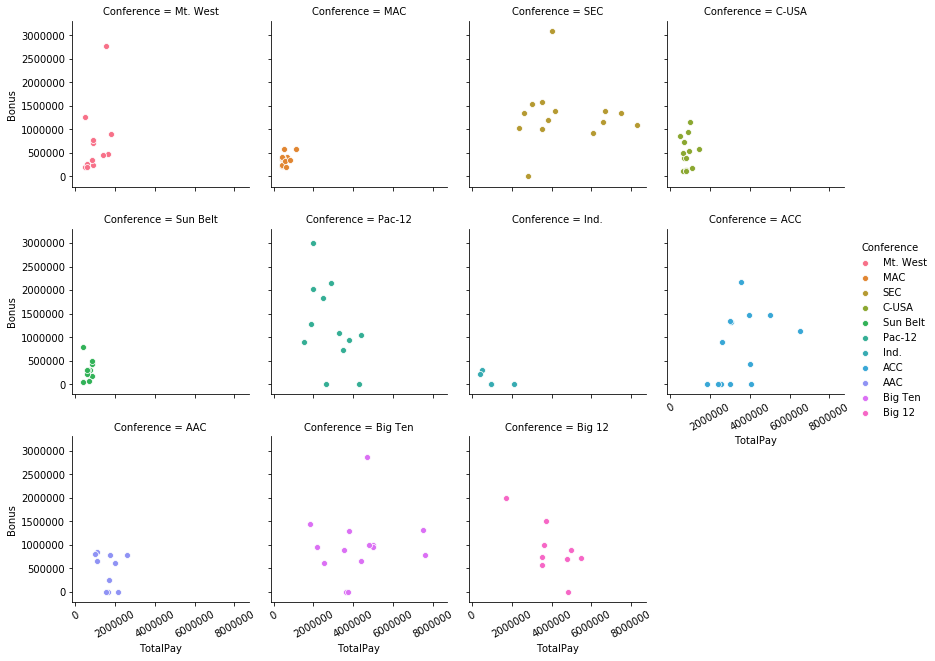

In [34]:
# Enlarge the plot
plt.figure(figsize=(20,9))

g = sns.FacetGrid(Coaches, col = "Conference", hue = "Conference", col_wrap=4)
g.map(sns.scatterplot, "TotalPay", "Bonus")
g.set_xticklabels(rotation=30)
g.add_legend()

plt.show()

In [35]:
Coaches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 128
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   School      125 non-null    object 
 1   Conference  125 non-null    object 
 2   Coach       125 non-null    object 
 3   TotalPay    125 non-null    float64
 4   Bonus       125 non-null    float64
 5   Buyout      125 non-null    float64
dtypes: float64(3), object(3)
memory usage: 11.8+ KB
